In [0]:
%tensorflow_version 2.x

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.special as sp
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn.apionly as sns

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
def save_model(m,filename):
    model_json = m.to_json()
    with open("/gdrive/My Drive/colab_data/"+filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights("/gdrive/My Drive/colab_data/"+filename+".h5")
    print("Saved model to disk")

In [0]:
def load_model_weights(filename, model):
    model.load_weights("/gdrive/My Drive/colab_data/"+filename+".h5")
    print("Loaded weights from disk")
    return model

In [0]:
def load_model(filename):
    json_file = open("/gdrive/My Drive/colab_data/"+filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights("/gdrive/My Drive/colab_data/"+filename+".h5")
    print("Loaded model from disk")
    return m

In [8]:
class my_cb(Callback):
    def __init__(self):
        self.epoch = 0
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        print('.',end='')
        
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        print('\n')
        print("{0:3d} epochs: accuracy={1:5.4f}".format(self.epoch, logs['accuracy']))

NameError: ignored

In [0]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml1920/dataset/"

def get_file(filename,local):
    if local:
        return filepath+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [0]:
# legge i dati in dataframe pandas
data = pd.read_csv(get_file("ex2data1.txt",False), header=0, delimiter=',', names=['x1','x2','t'])
# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t']).reshape(-1,1)

data[['x1','x2']] = StandardScaler().fit_transform(X)

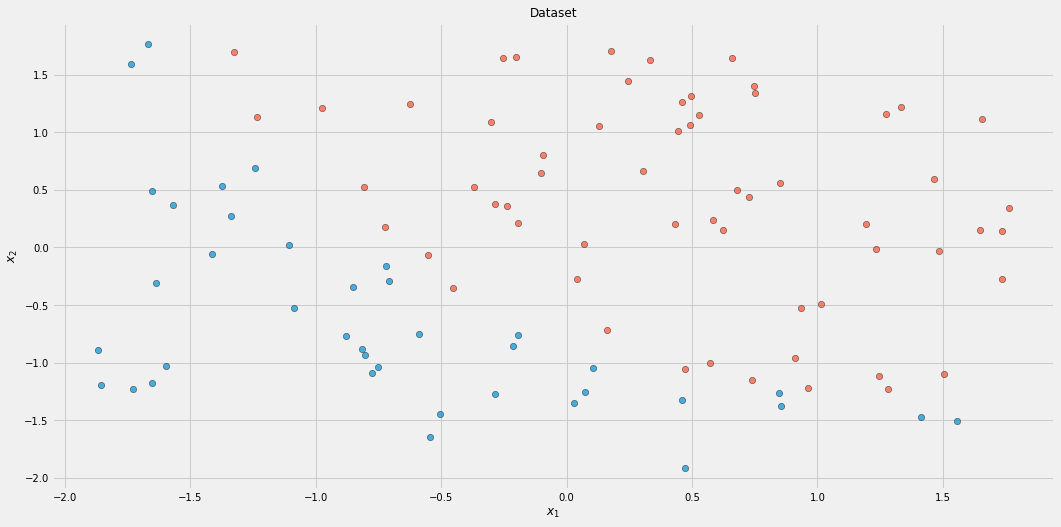

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, color=colors[0], edgecolor='k', alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40, color=colors[1], edgecolor='k', alpha=.7)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

In [0]:
num_classes = np.unique(t).shape[0]

In [0]:
t1 = to_categorical(t, num_classes)

In [0]:
delta1=max(data.x1)-min(data.x1)
delta2=max(data.x2)-min(data.x2)
min1=min(data.x1)-delta1/10
max1=max(data.x1)+delta1/10
min2=min(data.x2)-delta2/10
max2=max(data.x2)+delta2/10
u = np.linspace(min1, max1, 100)
v = np.linspace(min2, max2, 100)
u, v = np.meshgrid(u, v)

In [0]:
model0 = Sequential([
    Dense(15, input_dim=2, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
#    Dense(32, activation='relu'),
#    Dense(32, activation='relu'),
#    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model0.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
#model0 = load_model_weights('regr', model0)

In [34]:
model0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                45        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,182
Trainable params: 3,182
Non-trainable params: 0
_________________________________________________________________


In [35]:
batch_size = 10
epochs = 30

history = model0.fit(data[['x1','x2']], t.ravel(), shuffle=True, batch_size=5, epochs=epochs, verbose=1)

Epoch 1/30
99/99 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7475
Epoch 2/30
99/99 [==============================] - 0s 292us/step - loss: 0.2784 - accuracy: 0.8687
Epoch 3/30
99/99 [==============================] - 0s 328us/step - loss: 0.2105 - accuracy: 0.9091
Epoch 4/30
99/99 [==============================] - 0s 286us/step - loss: 0.1623 - accuracy: 0.9596
Epoch 5/30
99/99 [==============================] - 0s 304us/step - loss: 0.1820 - accuracy: 0.9091
Epoch 6/30
99/99 [==============================] - 0s 300us/step - loss: 0.1425 - accuracy: 0.9192
Epoch 7/30
99/99 [==============================] - 0s 333us/step - loss: 0.1802 - accuracy: 0.9293
Epoch 8/30
99/99 [==============================] - 0s 280us/step - loss: 0.1747 - accuracy: 0.8889
Epoch 9/30
99/99 [==============================] - 0s 293us/step - loss: 0.0995 - accuracy: 0.9697
Epoch 10/30
99/99 [==============================] - 0s 282us/step - loss: 0.1034 - accuracy: 0.9394
E

In [36]:
save_model(model0,'regr')

Saved model to disk


In [0]:
history_df = pd.DataFrame(history.history)

In [38]:
history_df.tail()

,loss,accuracy
25,0.241889,0.909091
26,0.207634,0.898990
27,0.132362,0.929293
28,0.077225,0.989899
29,0.053373,0.979798


In [0]:
z = model0.predict(np.c_[u.ravel(), v.ravel()])

In [0]:
z = z[:,0].reshape(u.shape)

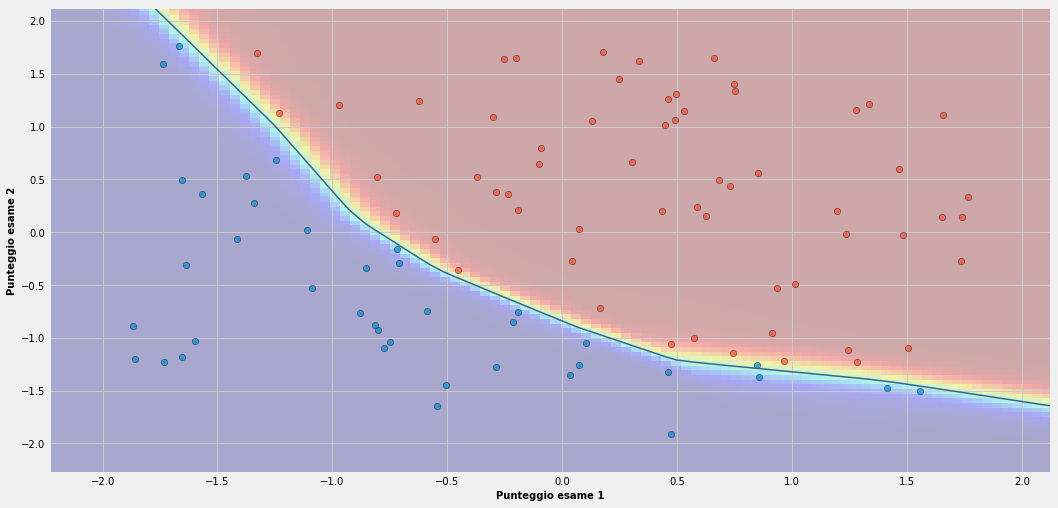

In [25]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
imshow_handle = plt.imshow(z, origin='lower', aspect='auto', extent=(min1, max1, min2, max2), alpha=.3)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, edgecolor='k', s=40, color=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, edgecolor='k', s=40, color=colors[1], alpha=.7)
plt.contour(u, v, z, [0.5], colors=[colors[8]], linewidths=[1.5])
plt.xlabel('Punteggio esame 1', fontsize=10)
plt.ylabel('Punteggio esame 2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [0]:
y = model0.predict(data[['x1','x2']])[:,0]

In [0]:
y = np.where(y>0.5, 1, 0)

In [43]:
cm = confusion_matrix(t,y)
cm

array([[36,  3],
       [ 0, 60]])

In [0]:
pr = precision_recall_fscore_support(t,y)

In [45]:
print('Classe 0: precision={0:5.3f}, recall={1:5.3f}'.format(pr[0][0], pr[1][0]))

print('Classe 1: precision={0:5.3f}, recall={1:5.3f}'.format(pr[1][0], pr[1][1]))

print('Accuracy={0:5.3f}'.format(accuracy_score(t,y)))

Classe 0: precision=1.000, recall=0.923
Classe 1: precision=0.923, recall=1.000
Accuracy=0.970
